In [3]:
import sys
import os
import json

from astropy.io import fits
from pprint import pprint
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['image.origin'] = 'lower'
import numpy as np
from astropy.wcs import WCS
from astropy.table import Table
import astropy.wcs.utils

In [4]:
# load files
pandeia = np.load('detector.npy')
lenstronomy_model = np.load('model.npy')
lenstronomy_sim = np.load('roman.npy')

In [5]:
# normalize
pandeia = pandeia / np.linalg.norm(pandeia)
lenstronomy_model = lenstronomy_model / np.linalg.norm(lenstronomy_model)
lenstronomy_sim = lenstronomy_sim / np.linalg.norm(lenstronomy_sim)

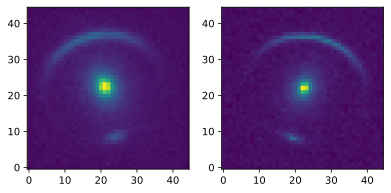

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(pandeia)
ax2.imshow(lenstronomy_sim)

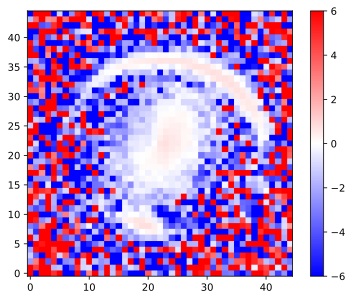

In [7]:
difference = (lenstronomy_sim - pandeia) / lenstronomy_sim

plt.imshow(difference, vmin=-6, vmax=6, cmap='bwr')
plt.colorbar()

In [14]:
from scipy import fft

pandeia_fft = fft.fft2(pandeia)
lenstronomy_sim_fft = fft.fft2(lenstronomy_sim)

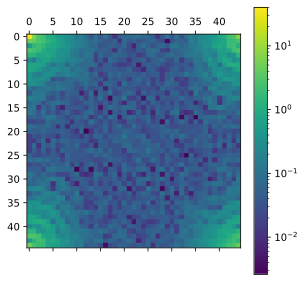

In [13]:
plt.matshow(np.abs(pandeia_fft), norm=matplotlib.colors.LogNorm())
plt.colorbar()

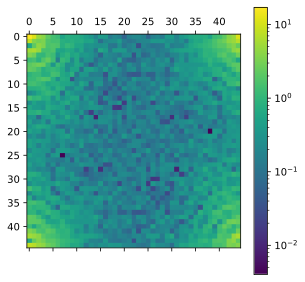

In [15]:
plt.matshow(np.abs(lenstronomy_sim_fft), norm=matplotlib.colors.LogNorm())
plt.colorbar()